In [1]:
!git clone https://github.com/DLCV-Fall-2024/DLCV-Fall-2024-HW2.git
!mv DLCV-Fall-2024-HW2/* .
!rm -rf DLCV-Fall-2024-HW2

Cloning into 'DLCV-Fall-2024-HW2'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 85 (delta 20), reused 45 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 434.84 KiB | 17.39 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [2]:
!pip install torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0+cu113 --extra-index-url https://download.pytorch.org/whl/cu113

!pip install albumentations==0.4.3 opencv-python pudb==2019.2 invisible-watermark \
imageio==2.9.0 imageio-ffmpeg==0.4.2 pytorch-lightning==1.4.2 omegaconf==2.1.1 \
einops==0.3.0 torch-fidelity==0.3.0 transformers==4.19.2 torchmetrics==0.6.0 \
kornia==0.6 matplotlib==3.7.0 detectors==0.1.8 wandb

# !cd stable-diffusion && pip install git+https://github.com/openai/CLIP.git@main
# !cd stable-diffusion && git clone https://github.com/CompVis/taming-transformers.git && pip install -e ./taming-transformers

# !cd stable-diffusion && pip install -e .
# !pip install -r requirements.txt
# !pip install wandb

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.4.1+cu121
    Uninstalling torchaudio-2.4.1+cu121:
      Successfully uninstalled torchaudio-2.4.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 85.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

In [ ]:
!cd /content/stable-diffusion/ && wget https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/resolve/main/sd-v1-4.ckpt
!mkdir -p /content/stable-diffusion/models/ldm/stable-diffusion-v1
!mv /content/stable-diffusion/sd-v1-4.ckpt /content/stable-diffusion/models/ldm/stable-diffusion-v1/model.ckpt

--2024-10-12 12:36:57--  https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/resolve/main/sd-v1-4.ckpt
Resolving huggingface.co (huggingface.co)... 3.169.36.25, 3.169.36.93, 3.169.36.71, ...
Connecting to huggingface.co (huggingface.co)|3.169.36.25|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/4c/37/4c372b4ebb57bbd02e68413d4951aa326d4b3cfb6e62db989e529c6d4b26fb21/fe4efff1e174c627256e44ec2991ba279b3816e364b49f9be2abc0b3ff3f8556?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27sd-v1-4.ckpt%3B+filename%3D%22sd-v1-4.ckpt%22%3B&Expires=1728995817&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyODk5NTgxN319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy80Yy8zNy80YzM3MmI0ZWJiNTdiYmQwMmU2ODQxM2Q0OTUxYWEzMjZkNGIzY2ZiNmU2MmRiOTg5ZTUyOWM2ZDRiMjZmYjIxL2ZlNGVmZmYxZTE3NGM2MjcyNTZlNDRlYzI5OTFiYTI3OWIzODE2ZTM2NGI0OWY5YmUyYWJjMGIzZmYzZjg1NTY%7EcmVzcG9uc2UtY29udGVudC1kaX

In [ ]:
!cd stable-diffusion/ && python scripts/txt2img.py --prompt "a photograph of an astronaut riding a horse"

Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Downloading: "https://github.com/DagnyT/hardnet/raw/master/pretrained/train_liberty_with_aug/checkpoint_liberty_with_aug.pth" to /root/.cache/torch/hub/checkpoints/checkpoint_liberty_with_aug.pth
100% 5.10M/5.10M [00:00<00:00, 20.0MB/s]
Downloading: 100% 939k/939k [00:00<00:00, 5.27MB/s]
Downloading: 100% 512k/512k [00:00<00:00, 1.01MB/s]
Downloading: 100% 389/389 [00:00<00:00, 2.57MB/s]
Downloading: 100% 905/905 [00:00<00:00, 4.55MB/s]
Downloading: 100% 4.41k/4.41k [00:00<00:00, 17.9MB/s]
Downloading: 100% 1.59G/1.59G [00:18<00:00, 91.9MB/s]
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when ini

In [10]:
!gdown 1W6Y1OmjzNw2qHoGDCpGOwGpw27wLg1fi -O hw2_data.zip
!rm -rf ./hw2_data
!unzip ./hw2_data.zip -d ./
!rm hw2_data.zip


Streaming output truncated to the last 5000 lines.
 extracting: ./hw2_data/digits/mnistm/data/10444.png  
 extracting: ./hw2_data/digits/mnistm/data/46944.png  
 extracting: ./hw2_data/digits/mnistm/data/31774.png  
 extracting: ./hw2_data/digits/mnistm/data/35413.png  
 extracting: ./hw2_data/digits/mnistm/data/08737.png  
 extracting: ./hw2_data/digits/mnistm/data/50540.png  
 extracting: ./hw2_data/digits/mnistm/data/07466.png  
 extracting: ./hw2_data/digits/mnistm/data/31555.png  
 extracting: ./hw2_data/digits/mnistm/data/13782.png  
 extracting: ./hw2_data/digits/mnistm/data/26480.png  
 extracting: ./hw2_data/digits/mnistm/data/54403.png  
 extracting: ./hw2_data/digits/mnistm/data/17219.png  
 extracting: ./hw2_data/digits/mnistm/data/18474.png  
 extracting: ./hw2_data/digits/mnistm/data/45797.png  
 extracting: ./hw2_data/digits/mnistm/data/54181.png  
 extracting: ./hw2_data/digits/mnistm/data/43936.png  
 extracting: ./hw2_data/digits/mnistm/data/11355.png  
 extracting: .

In [1]:
import math
import torch
from torch import nn
from torch.nn import functional as F


def drop_connect(x, drop_ratio):
    keep_ratio = 1.0 - drop_ratio
    mask = torch.empty([x.shape[0], 1, 1, 1], dtype=x.dtype, device=x.device)
    mask.bernoulli_(p=keep_ratio)
    x.div_(keep_ratio)
    x.mul_(mask)
    return x


class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


class TimeEmbedding(nn.Module):
    def __init__(self, T, d_model, dim):
        assert d_model % 2 == 0
        super().__init__()
        emb = torch.arange(0, d_model, step=2) / d_model * math.log(10000)
        emb = torch.exp(-emb)
        pos = torch.arange(T).float()
        emb = pos[:, None] * emb[None, :]
        assert list(emb.shape) == [T, d_model // 2]
        emb = torch.stack([torch.sin(emb), torch.cos(emb)], dim=-1)
        assert list(emb.shape) == [T, d_model // 2, 2]
        emb = emb.view(T, d_model)

        self.timembedding = nn.Sequential(
            nn.Embedding.from_pretrained(emb, freeze=False),
            nn.Linear(d_model, dim),
            Swish(),
            nn.Linear(dim, dim),
        )

    def forward(self, t):
        emb = self.timembedding(t)
        return emb


class ConditionalEmbedding(nn.Module):
    def __init__(self, num_labels, d_model, dim):
        assert d_model % 2 == 0
        super().__init__()
        self.condEmbedding = nn.Sequential(
            nn.Embedding(
                num_embeddings=num_labels + 1, embedding_dim=d_model, padding_idx=0
            ),
            nn.Linear(d_model, dim),
            Swish(),
            nn.Linear(dim, dim),
        )

    def forward(self, t):
        emb = self.condEmbedding(t)
        return emb


class DownSample(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.c1 = nn.Conv2d(in_ch, in_ch, 3, stride=2, padding=1)
        self.c2 = nn.Conv2d(in_ch, in_ch, 5, stride=2, padding=2)

    def forward(self, x, temb, cemb, demb):
        x = self.c1(x) + self.c2(x)
        return x


class UpSample(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.c = nn.Conv2d(in_ch, in_ch, 3, stride=1, padding=1)
        self.t = nn.ConvTranspose2d(in_ch, in_ch, 5, 2, 2, 1)

    def forward(self, x, temb, cemb, demb):
        _, _, H, W = x.shape
        x = self.t(x)
        x = self.c(x)
        return x


class AttnBlock(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.group_norm = nn.GroupNorm(32, in_ch)
        self.proj_q = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj_k = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj_v = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)

    def forward(self, x):
        B, C, H, W = x.shape
        h = self.group_norm(x)
        q = self.proj_q(h)
        k = self.proj_k(h)
        v = self.proj_v(h)

        q = q.permute(0, 2, 3, 1).view(B, H * W, C)
        k = k.view(B, C, H * W)
        w = torch.bmm(q, k) * (int(C) ** (-0.5))
        assert list(w.shape) == [B, H * W, H * W]
        w = F.softmax(w, dim=-1)

        v = v.permute(0, 2, 3, 1).view(B, H * W, C)
        h = torch.bmm(w, v)
        assert list(h.shape) == [B, H * W, C]
        h = h.view(B, H, W, C).permute(0, 3, 1, 2)
        h = self.proj(h)

        return x + h


class ResBlock(nn.Module):
    def __init__(self, in_ch, out_ch, tdim, dropout, attn=True):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.GroupNorm(32, in_ch),
            Swish(),
            nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1),
        )
        self.temb_proj = nn.Sequential(
            Swish(),
            nn.Linear(tdim, out_ch),
        )
        self.cond_proj = nn.Sequential(
            Swish(),
            nn.Linear(tdim, out_ch),
        )
        self.block2 = nn.Sequential(
            nn.GroupNorm(32, out_ch),
            Swish(),
            nn.Dropout(dropout),
            nn.Conv2d(out_ch, out_ch, 3, stride=1, padding=1),
        )
        if in_ch != out_ch:
            self.shortcut = nn.Conv2d(in_ch, out_ch, 1, stride=1, padding=0)
        else:
            self.shortcut = nn.Identity()
        if attn:
            self.attn = AttnBlock(out_ch)
        else:
            self.attn = nn.Identity()

    def forward(self, x, temb, cemb, demb):
        h = self.block1(x)
        h += self.temb_proj(temb)[:, :, None, None]
        h += self.cond_proj(cemb)[:, :, None, None]
        h += self.cond_proj(demb)[:, :, None, None]
        h = self.block2(h)

        h = h + self.shortcut(x)
        h = self.attn(h)
        return h


class UNet(nn.Module):
    def __init__(self, T, num_labels, num_datasets, ch, ch_mult, num_res_blocks, dropout):
        super().__init__()
        tdim = ch * 4
        self.embedding_dim = tdim
        self.time_embedding = TimeEmbedding(T, ch, tdim)
        self.cond_embedding = ConditionalEmbedding(num_labels, ch, tdim)
        self.data_embedding = ConditionalEmbedding(num_datasets, ch, tdim)
        self.head = nn.Conv2d(3, ch, kernel_size=3, stride=1, padding=1)
        self.downblocks = nn.ModuleList()
        chs = [ch]
        now_ch = ch
        for i, mult in enumerate(ch_mult):
            out_ch = ch * mult
            for _ in range(num_res_blocks):
                self.downblocks.append(
                    ResBlock(in_ch=now_ch, out_ch=out_ch, tdim=tdim, dropout=dropout)
                )
                now_ch = out_ch
                chs.append(now_ch)
            if i != len(ch_mult) - 1:
                self.downblocks.append(DownSample(now_ch))
                chs.append(now_ch)

        self.middleblocks = nn.ModuleList(
            [
                ResBlock(now_ch, now_ch, tdim, dropout, attn=True),
                ResBlock(now_ch, now_ch, tdim, dropout, attn=False),
            ]
        )

        self.upblocks = nn.ModuleList()
        for i, mult in reversed(list(enumerate(ch_mult))):
            out_ch = ch * mult
            for _ in range(num_res_blocks + 1):
                self.upblocks.append(
                    ResBlock(
                        in_ch=chs.pop() + now_ch,
                        out_ch=out_ch,
                        tdim=tdim,
                        dropout=dropout,
                        attn=False,
                    )
                )
                now_ch = out_ch
            if i != 0:
                self.upblocks.append(UpSample(now_ch))
        assert len(chs) == 0

        self.tail = nn.Sequential(
            nn.GroupNorm(32, now_ch),
            Swish(),
            nn.Conv2d(now_ch, 3, 3, stride=1, padding=1),
        )

    def forward(self, x, t, c, d):
        # Timestep embedding
        temb = self.time_embedding(t)
        if c is not None:
            cemb = self.cond_embedding(c)
        else:
            batch_size = x.size(0)
            cemb = torch.zeros(batch_size, self.embedding_dim, device=x.device)

        demb = self.data_embedding(d)

        # Downsampling
        h = self.head(x)
        hs = [h]
        for layer in self.downblocks:
            h = layer(h, temb, cemb, demb)
            hs.append(h)
        # Middle
        for layer in self.middleblocks:
            h = layer(h, temb, cemb, demb)
        # Upsampling
        for layer in self.upblocks:
            if isinstance(layer, ResBlock):
                h = torch.cat([h, hs.pop()], dim=1)
            h = layer(h, temb, cemb, demb)
        h = self.tail(h)

        assert len(hs) == 0
        return h


if __name__ == "__main__":
    batch_size = 128
    model = UNet(
        T=1000,
        num_labels=10,
        num_datasets=2,
        ch=128,
        ch_mult=[1, 2, 2, 2],
        num_res_blocks=2,
        dropout=0.1,
    )
    x = torch.randn(batch_size, 3, 32, 32)
    t = torch.randint(200, size=[batch_size])
    c = torch.randint(10, size=[batch_size])
    d = torch.randint(2, size=[batch_size])


    y = model(x, t, c, d)
    print(y.shape)


torch.Size([128, 3, 32, 32])


In [2]:
import os

import pandas as pd
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader


class DDPMDataset(Dataset):
    def __init__(self, mnistm_path, svhn_path, transform=None):
        self.mnistm_data = pd.read_csv(os.path.join(mnistm_path, "train.csv"))
        self.mnistm_img_dir = os.path.join(mnistm_path, "data")

        self.svhn_data = pd.read_csv(os.path.join(svhn_path, "train.csv"))
        self.svhn_img_dir = os.path.join(svhn_path, "data")

        self.transform = transform

    def __len__(self):
        return len(self.mnistm_data) + len(self.svhn_data)

    def __getitem__(self, idx):
        if idx < len(self.mnistm_data):
            img_name = self.mnistm_data.iloc[idx, 0]
            img_path = f"{self.mnistm_img_dir}/{img_name}"
            label = self.mnistm_data.iloc[idx, 1]
            d = torch.tensor(0, dtype=torch.long)
        else:
            idx -= len(self.mnistm_data)
            img_name = self.svhn_data.iloc[idx, 0]
            img_path = f"{self.svhn_img_dir}/{img_name}"
            label = self.svhn_data.iloc[idx, 1]
            d = torch.tensor(1, dtype=torch.long)

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label, d

In [37]:
import pytorch_lightning as pl
import torch
import torchvision
from torch import nn
import wandb
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader, random_split
import os

class DDPM(pl.LightningModule):
    def __init__(self, model, cond_scale=0.5, T=200):
        super().__init__()
        self.model = model
        self.cond_scale = cond_scale
        self.T = T

        alpha = torch.linspace(0.999, 0.99, T)
        self.register_buffer('alpha', alpha)

        alpha_bar = torch.cumprod(self.alpha, dim=-1).reshape(-1, 1)
        self.register_buffer('alpha_bar', alpha_bar)


    def forward(self, x, t, c, d):
        return self.model(x, t, c, d)

    def denoise_step(self, x, t, c, d):
        if c is not None:
            return (1 + self.cond_scale) * self.model(
                x, t, c, d
            ) - self.cond_scale * self.model(x, t, None, d)
        else:
            return self.model(x, t, None, d)
        # return self.model(x, t, c, d)

    def diffusion_step(self, x, t, noise):
        batch_size = x.size(0)
        alpha_bar_t = self.alpha_bar[t].view(batch_size, 1, 1, 1).to(x.device)

        return torch.sqrt(alpha_bar_t) * x + torch.sqrt(1 - alpha_bar_t) * noise

    def training_step(self, batch, batch_idx):
        x0, c, d = batch
        t = torch.randint(0, self.T, (x0.size(0),), device=self.device)
        noise = torch.randn_like(x0)

        x_t = self.diffusion_step(x0, t, noise)

        cond_input = c if torch.rand(()) > 0.1 else None

        pred_noise = self.model(x_t, t, cond_input, d)
        loss = nn.functional.mse_loss(pred_noise, noise)

        self.log(
            "train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True
        )

        return loss

    def validation_step(self, batch, batch_idx):
        x0, c, d = batch
        t = torch.randint(0, self.T, (x0.size(0),), device=self.device)
        noise = torch.randn_like(x0)

        x_t = self.diffusion_step(x0, t, noise)

        use_cond = torch.rand(()) > 0.1
        cond_input = c if use_cond else None

        pred_noise = self.model(x_t, t, cond_input, d)
        loss = nn.functional.mse_loss(pred_noise, noise)

        self.log(
            "val_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True
        )

        # if batch_idx == 0:
        #     sampled_images = self.sample(shape=x0.shape, c=c, d=d)
        #     grid = torchvision.utils.make_grid(sampled_images)

        #     self.logger.experiment.log({"sampled_images": [wandb.Image(grid)]})

        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(params=self.parameters(), lr=1e-4)

    def sample(self, shape, d, c=None):
        x = torch.randn(shape).to(self.device)

        for t in reversed(range(self.T)):
            print("t:", t)
            t_tensor = torch.full((x.shape[0],), t, dtype=torch.long).to(self.device)

            eps = self.denoise_step(x, t_tensor, c, d)

            if t > 0:
                z = torch.randn_like(x)
            else:
                z = torch.zeros_like(x)

            x = (1 / torch.sqrt(self.alpha[t])) * (
                x - (1 - self.alpha[t]) * eps / torch.sqrt(1 - self.alpha_bar[t])
            ) + torch.sqrt(1 - self.alpha[t]) * z

        return x


if __name__ == "__main__":
# if False:
    cond_scale = 5
    T = 500
    torch.manual_seed(42)
    os.environ["WANDB_API_KEY"] = "cea091384aba595fb3f51ee372ed755a0ac3ba5d"

    transform = torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Resize((32, 32)),
            torchvision.transforms.Normalize(
                [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
            ),
        ]
    )

    unet = UNet(
        T=T,
        num_labels=10,
        num_datasets=2,
        ch=128,
        ch_mult=[1, 2, 2, 2],
        num_res_blocks=2,
        dropout=0.1,
    )
    ddpm = DDPM(unet, cond_scale=cond_scale, T=T)

    dataset = DDPMDataset(
        mnistm_path="hw2_data/digits/mnistm",
        svhn_path="hw2_data/digits/svhn",
        transform=transform,
    )


    dataset_size = len(dataset)
    train_size = int(0.99 * dataset_size)
    val_size = dataset_size - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

    # print(ddpm)
    wandb_logger = WandbLogger(project="DLCV-hw2-p1", log_model=True)
    wandb_logger.log_hyperparams({"cond_scale": cond_scale, "T": T})


    checkpoint_callback = ModelCheckpoint(
        monitor="val_loss",
        mode="min",
        filename="{epoch}-{val_loss:.5f}",
        save_top_k=1,
        verbose=True,
    )

    trainer = pl.Trainer(
        max_epochs=100,
        logger=wandb_logger,
        callbacks=[checkpoint_callback],
        gpus=1,
        # resume_from_checkpoint='epoch=70-val_loss=0.003.ckpt'
    )

    trainer.fit(ddpm, train_loader, val_loader)


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.core.lightning:
  | Name  | Type | Params
-------------------------------
0 | model | UNet | 48.0 M
-------------------------------
48.0 M    Trainable params
0         Non-trainable params
48.0 M    Total params
192.119   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 0, global step 1047: val_loss reached 0.02608 (best 0.02608), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=0-val_loss=0.02608.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 1, global step 2095: val_loss reached 0.02268 (best 0.02268), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=1-val_loss=0.02268.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 2, global step 3143: val_loss reached 0.02181 (best 0.02181), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=2-val_loss=0.02181.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 3, global step 4191: val_loss reached 0.02097 (best 0.02097), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=3-val_loss=0.02097.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 4, global step 5239: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 5, global step 6287: val_loss reached 0.02071 (best 0.02071), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=5-val_loss=0.02071.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 6, global step 7335: val_loss reached 0.02063 (best 0.02063), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=6-val_loss=0.02063.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 7, global step 8383: val_loss reached 0.01991 (best 0.01991), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=7-val_loss=0.01991.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 8, global step 9431: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 9, global step 10479: val_loss reached 0.01931 (best 0.01931), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=9-val_loss=0.01931.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 10, global step 11527: val_loss reached 0.01917 (best 0.01917), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=10-val_loss=0.01917.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 11, global step 12575: val_loss reached 0.01825 (best 0.01825), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=11-val_loss=0.01825.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 12, global step 13623: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 13, global step 14671: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 14, global step 15719: val_loss reached 0.01779 (best 0.01779), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=14-val_loss=0.01779.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 15, global step 16767: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 16, global step 17815: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 17, global step 18863: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 18, global step 19911: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 19, global step 20959: val_loss reached 0.01750 (best 0.01750), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=19-val_loss=0.01750.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 20, global step 22007: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 21, global step 23055: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 22, global step 24103: val_loss reached 0.01683 (best 0.01683), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=22-val_loss=0.01683.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 23, global step 25151: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 24, global step 26199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 25, global step 27247: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 26, global step 28295: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 27, global step 29343: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 28, global step 30391: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 29, global step 31439: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 30, global step 32487: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 31, global step 33535: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 32, global step 34583: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 33, global step 35631: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 34, global step 36679: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 35, global step 37727: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 36, global step 38775: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 37, global step 39823: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 38, global step 40871: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 39, global step 41919: val_loss reached 0.01683 (best 0.01683), saving model to "/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=39-val_loss=0.01683.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 40, global step 42967: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 41, global step 44015: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Epoch 42, global step 45063: val_loss was not in top 1
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py:1047: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


KeyboardInterrupt: 

In [38]:
import torch
import torchvision
import random
import numpy as np
import os
import time
from concurrent.futures import ThreadPoolExecutor
from torchvision.transforms.functional import to_pil_image

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

def generate_and_save_images(model, device, save_dir, num_samples_per_digit=50):
    model.eval()
    model.to(device)

    num_digits = 10
    num_datasets = 2
    total_samples = num_samples_per_digit * num_digits * num_datasets


    c = torch.repeat_interleave(torch.arange(num_digits), num_samples_per_digit * num_datasets).to(device)
    d = torch.tensor([0]*num_samples_per_digit + [1]*num_samples_per_digit).repeat(num_digits).to(device)

    with torch.no_grad():
        sampled_images = model.sample(shape=(total_samples, 3, 32, 32), c=c, d=d)
        sampled_images = (sampled_images.cpu() + 1) / 2

    mnistm_dir = os.path.join(save_dir, 'mnistm')
    svhn_dir = os.path.join(save_dir, 'svhn')
    os.makedirs(mnistm_dir, exist_ok=True)
    os.makedirs(svhn_dir, exist_ok=True)

    def save_image(idx):
        img = sampled_images[idx]
        digit = c[idx].item()
        dataset = d[idx].item()
        sample_num = (idx % num_samples_per_digit) + 1
        sample_num_str = f"{sample_num:03d}"
        filename = f"{digit}_{sample_num_str}.png"
        img = to_pil_image(img)
        if dataset == 0:
            save_path = os.path.join(mnistm_dir, filename)
        else:
            save_path = os.path.join(svhn_dir, filename)
        img.save(save_path)

    with ThreadPoolExecutor() as executor:
        executor.map(save_image, range(total_samples))

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    T = 500
    cond_scale = 10

    unet = UNet(
        T=T,
        num_labels=10,
        num_datasets=2,
        ch=128,
        ch_mult=[1, 2, 2, 2],
        num_res_blocks=2,
        dropout=0.1,
    )
    ddpm = DDPM(unet, cond_scale=cond_scale, T=T)

    checkpoint_path = '/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=39-val_loss=0.01683.ckpt'
    state_dict = torch.load(checkpoint_path, map_location=device)
    ddpm.load_state_dict(state_dict['state_dict'])

    ddpm.to(device)

    save_dir = 'output_images'
    os.makedirs(save_dir, exist_ok=True)

    num_samples_per_digit = 50

    start_time = time.time()

    generate_and_save_images(ddpm, device, save_dir, num_samples_per_digit=num_samples_per_digit)

    end_time = time.time()

    elapsed_time = end_time - start_time
    print(f"Image generation and saving completed in {elapsed_time:.2f} seconds.")


t: 499
t: 498
t: 497
t: 496
t: 495
t: 494
t: 493
t: 492
t: 491
t: 490
t: 489
t: 488
t: 487
t: 486
t: 485
t: 484
t: 483
t: 482
t: 481
t: 480
t: 479
t: 478
t: 477
t: 476
t: 475
t: 474
t: 473
t: 472
t: 471
t: 470
t: 469
t: 468
t: 467
t: 466
t: 465
t: 464
t: 463
t: 462
t: 461
t: 460
t: 459
t: 458
t: 457
t: 456
t: 455
t: 454
t: 453
t: 452
t: 451
t: 450
t: 449
t: 448
t: 447
t: 446
t: 445
t: 444
t: 443
t: 442
t: 441
t: 440
t: 439
t: 438
t: 437
t: 436
t: 435
t: 434
t: 433
t: 432
t: 431
t: 430
t: 429
t: 428
t: 427
t: 426
t: 425
t: 424
t: 423
t: 422
t: 421
t: 420
t: 419
t: 418
t: 417
t: 416
t: 415
t: 414
t: 413
t: 412
t: 411
t: 410
t: 409
t: 408
t: 407
t: 406
t: 405
t: 404
t: 403
t: 402
t: 401
t: 400
t: 399
t: 398
t: 397
t: 396
t: 395
t: 394
t: 393
t: 392
t: 391
t: 390
t: 389
t: 388
t: 387
t: 386
t: 385
t: 384
t: 383
t: 382
t: 381
t: 380
t: 379
t: 378
t: 377
t: 376
t: 375
t: 374
t: 373
t: 372
t: 371
t: 370
t: 369
t: 368
t: 367
t: 366
t: 365
t: 364
t: 363
t: 362
t: 361
t: 360
t: 359
t: 358
t: 357

In [39]:
!python digit_classifier.py --folder output_images --checkpoint Classifier.pth
# !rm -rf output_images
# !ls

Model loaded from Classifier.pth
MNIST-M acc = 0.9800 (correct/total = 490/500)
SVHN acc = 1.0000 (correct/total = 500/500)
acc = 0.9900


In [40]:
import torch
import torchvision
import random
import numpy as np
import os
import time
from concurrent.futures import ThreadPoolExecutor
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid
from PIL import Image

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

def generate_and_save_images(model, device, save_dir, num_samples_per_digit=10):
    model.eval()
    model.to(device)

    num_digits = 10
    num_datasets = 2
    total_samples = num_samples_per_digit * num_digits * num_datasets

    c = torch.repeat_interleave(torch.arange(num_digits), num_samples_per_digit * num_datasets).to(device)
    d = torch.tensor([0]*num_samples_per_digit + [1]*num_samples_per_digit).repeat(num_digits).to(device)

    with torch.no_grad():
        sampled_images = model.sample(shape=(total_samples, 3, 32, 32), c=c, d=d)
        sampled_images = (sampled_images.cpu() + 1) / 2

    mnistm_images = sampled_images[d == 0]
    svhn_images = sampled_images[d == 1]

    mnistm_grid = make_grid(mnistm_images, nrow=10, padding=2)
    mnistm_img = to_pil_image(mnistm_grid)
    mnistm_img.save(os.path.join(save_dir, 'mnistm_grid.png'))

    svhn_grid = make_grid(svhn_images, nrow=10, padding=2)
    svhn_img = to_pil_image(svhn_grid)
    svhn_img.save(os.path.join(save_dir, 'svhn_grid.png'))

    print(f"Grids for MNIST-M and SVHN datasets saved to {save_dir}")

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    T = 500
    cond_scale = 10

    unet = UNet(
        T=T,
        num_labels=10,
        num_datasets=2,
        ch=128,
        ch_mult=[1, 2, 2, 2],
        num_res_blocks=2,
        dropout=0.1,
    )
    ddpm = DDPM(unet, cond_scale=cond_scale, T=T)

    checkpoint_path = '/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=39-val_loss=0.01683.ckpt'
    state_dict = torch.load(checkpoint_path, map_location=device)
    ddpm.load_state_dict(state_dict['state_dict'])

    ddpm.to(device)

    save_dir = 'grid_images'
    os.makedirs(save_dir, exist_ok=True)

    num_samples_per_digit = 10

    start_time = time.time()

    generate_and_save_images(ddpm, device, save_dir, num_samples_per_digit=num_samples_per_digit)

    end_time = time.time()

    elapsed_time = end_time - start_time
    print(f"Image generation and saving completed in {elapsed_time:.2f} seconds.")


t: 499
t: 498
t: 497
t: 496
t: 495
t: 494
t: 493
t: 492
t: 491
t: 490
t: 489
t: 488
t: 487
t: 486
t: 485
t: 484
t: 483
t: 482
t: 481
t: 480
t: 479
t: 478
t: 477
t: 476
t: 475
t: 474
t: 473
t: 472
t: 471
t: 470
t: 469
t: 468
t: 467
t: 466
t: 465
t: 464
t: 463
t: 462
t: 461
t: 460
t: 459
t: 458
t: 457
t: 456
t: 455
t: 454
t: 453
t: 452
t: 451
t: 450
t: 449
t: 448
t: 447
t: 446
t: 445
t: 444
t: 443
t: 442
t: 441
t: 440
t: 439
t: 438
t: 437
t: 436
t: 435
t: 434
t: 433
t: 432
t: 431
t: 430
t: 429
t: 428
t: 427
t: 426
t: 425
t: 424
t: 423
t: 422
t: 421
t: 420
t: 419
t: 418
t: 417
t: 416
t: 415
t: 414
t: 413
t: 412
t: 411
t: 410
t: 409
t: 408
t: 407
t: 406
t: 405
t: 404
t: 403
t: 402
t: 401
t: 400
t: 399
t: 398
t: 397
t: 396
t: 395
t: 394
t: 393
t: 392
t: 391
t: 390
t: 389
t: 388
t: 387
t: 386
t: 385
t: 384
t: 383
t: 382
t: 381
t: 380
t: 379
t: 378
t: 377
t: 376
t: 375
t: 374
t: 373
t: 372
t: 371
t: 370
t: 369
t: 368
t: 367
t: 366
t: 365
t: 364
t: 363
t: 362
t: 361
t: 360
t: 359
t: 358
t: 357

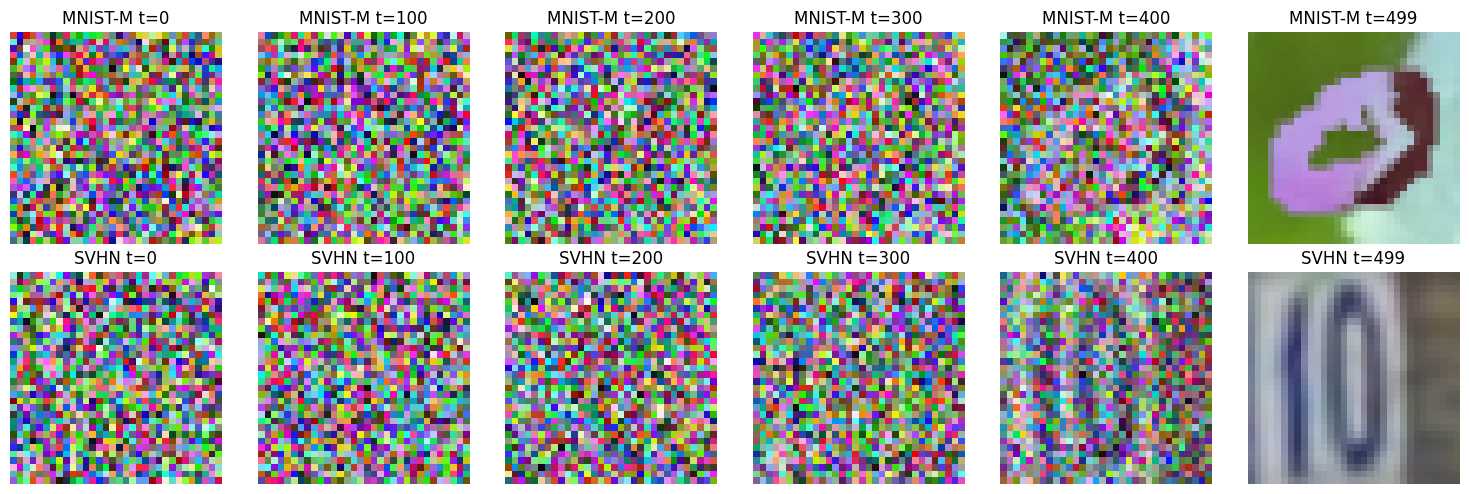

In [41]:
import matplotlib.pyplot as plt


seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


def visualize_reverse_process(model, device, num_images=6):
    model.eval()
    model.to(device)

    # Generate a single "0" digit (digit=0, d=0 for MNISTM and d=1 for SVHN)
    shape = (1, 3, 32, 32)  # Single image shape for visualization
    c = torch.tensor([0]).to(device)  # Digit 0
    d_mnistm = torch.tensor([0]).to(device)  # MNISTM dataset
    d_svhn = torch.tensor([1]).to(device)  # SVHN dataset

    # Lists to store the intermediate images at different time steps
    images_mnistm = []
    images_svhn = []

    with torch.no_grad():
        x_mnistm = torch.randn(shape).to(device)
        x_svhn = torch.randn(shape).to(device)

        timesteps = [0, int(0.2 * model.T), int(0.4 * model.T), int(0.6 * model.T), int(0.8 * model.T), model.T-1]

        for t in reversed(range(model.T)):
            t_tensor = torch.full((x_mnistm.shape[0],), t, dtype=torch.long).to(device)

            eps_mnistm = model.denoise_step(x_mnistm, t_tensor, c, d_mnistm)
            eps_svhn = model.denoise_step(x_svhn, t_tensor, c, d_svhn)

            # Add noise for next step
            if t > 0:
                z_mnistm = torch.randn_like(x_mnistm)
                z_svhn = torch.randn_like(x_svhn)
            else:
                z_mnistm = torch.zeros_like(x_mnistm)
                z_svhn = torch.zeros_like(x_svhn)

            x_mnistm = (1 / torch.sqrt(model.alpha[t])) * (
                x_mnistm - (1 - model.alpha[t]) * eps_mnistm / torch.sqrt(1 - model.alpha_bar[t])
            ) + torch.sqrt(1 - model.alpha[t]) * z_mnistm

            x_svhn = (1 / torch.sqrt(model.alpha[t])) * (
                x_svhn - (1 - model.alpha[t]) * eps_svhn / torch.sqrt(1 - model.alpha_bar[t])
            ) + torch.sqrt(1 - model.alpha[t]) * z_svhn

            if t in timesteps:
                images_mnistm.append((x_mnistm.cpu() + 1) / 2)
                images_svhn.append((x_svhn.cpu() + 1) / 2)

    fig, axs = plt.subplots(2, num_images, figsize=(15, 5))

    for i, img in enumerate(images_mnistm):
        axs[0, i].imshow(to_pil_image(img[0]))
        axs[0, i].set_title(f"MNIST-M t={timesteps[i]}")
        axs[0, i].axis('off')

    for i, img in enumerate(images_svhn):
        axs[1, i].imshow(to_pil_image(img[0]))
        axs[1, i].set_title(f"SVHN t={timesteps[i]}")
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    T = 500
    cond_scale = 10

    unet = UNet(
        T=T,
        num_labels=10,
        num_datasets=2,
        ch=128,
        ch_mult=[1, 2, 2, 2],
        num_res_blocks=2,
        dropout=0.1,
    )
    ddpm = DDPM(unet, cond_scale=cond_scale, T=T)

    checkpoint_path = '/content/DLCV-hw2-p1/cmqg07rj/checkpoints/epoch=39-val_loss=0.01683.ckpt'
    state_dict = torch.load(checkpoint_path, map_location=device)
    ddpm.load_state_dict(state_dict['state_dict'])

    ddpm.to(device)

    visualize_reverse_process(ddpm, device)
